# **Veri Setini İnceleme**

In [ ]:
import pandas as pd

df = pd.read_csv("FinalDf.csv")
df

,İlçe,Mahalle,Oda Sayısı,Salon Sayısı,Banyo Sayısı,Brüt M2,Kat Sayısı,Bulunduğu Kat,Kat Index,Bina Yaşı,Eşya Durumu,Kullanım Durumu,Doğu,Batı,Kuzey,Güney,Kira
0,Tepebaşı,Ertuğrulgazi Mah.,2,1,1,130,2,2,1.000000,15,0,0,1,1,0,0,12500
1,Tepebaşı,Şirintepe Mah.,1,1,1,60,3,1,0.333333,5,0,0,0,0,0,0,9000
2,Tepebaşı,Sütlüce Mah.,1,1,1,50,3,3,1.000000,4,0,0,0,0,0,0,10000
3,Tepebaşı,Batıkent Mah.,2,1,1,100,3,2,0.666667,11,0,0,0,0,0,0,15000
4,Tepebaşı,Şirintepe Mah.,1,1,1,60,4,3,0.750000,11,1,0,0,0,0,0,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,Tepebaşı,Şirintepe Mah.,1,1,1,60,3,1,0.333333,11,1,0,0,0,0,0,9000
959,Odunpazarı,Büyükdere Mah.,1,1,1,70,3,1,0.333333,5,1,0,0,0,0,0,13250
960,Tepebaşı,Sütlüce Mah.,1,1,1,48,3,3,1.000000,10,1,1,0,0,0,0,9000
961,Tepebaşı,Ertuğrulgazi Mah.,1,1,1,60,3,1,0.333333,8,1,0,1,1,0,0,10000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   İlçe             963 non-null    object 
 1   Mahalle          963 non-null    object 
 2   Oda Sayısı       963 non-null    int64  
 3   Salon Sayısı     963 non-null    int64  
 4   Banyo Sayısı     963 non-null    int64  
 5   Brüt M2          963 non-null    int64  
 6   Kat Sayısı       963 non-null    int64  
 7   Bulunduğu Kat    963 non-null    int64  
 8   Kat Index        963 non-null    float64
 9   Bina Yaşı        963 non-null    int64  
 10  Eşya Durumu      963 non-null    int64  
 11  Kullanım Durumu  963 non-null    int64  
 12  Doğu             963 non-null    int64  
 13  Batı             963 non-null    int64  
 14  Kuzey            963 non-null    int64  
 15  Güney            963 non-null    int64  
 16  Kira             963 non-null    int64  
dtypes: float64(1), i

In [ ]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}\n")

Unique values in column 'İlçe': ['Tepebaşı' 'Odunpazarı']

Unique values in column 'Mahalle': ['Ertuğrulgazi Mah.' 'Şirintepe Mah.' 'Sütlüce Mah.' 'Batıkent Mah.'
 'Emek Mah.' 'Şarhöyük Mah.' 'Kırmızıtoprak Mah.' 'Çamlıca Mah.'
 'Yenibağlar Mah.' 'Kumlubel Mah.' 'Mamure Mah.' 'Tunalı Mah.'
 'Erenköy Mah.' 'Arifiye Mah.' 'Cumhuriye Mah.' 'Uluönder Mah.'
 'Göztepe Mah.' 'İstiklal Mah.' 'Eskibağlar Mah.' 'Ömerağa Mah.'
 'Kurtuluş Mah.' 'Esentepe Mah.' 'Gökmeydan Mah.' 'Yenidoğan Mah.'
 'Akarbaşı Mah.' '71 Evler Mah.' 'Çankaya Mah.' 'Bahçelievler Mah.'
 'Yenikent Mah.' 'Güllük Mah.' 'Büyükdere Mah.' 'Hoşnudiye Mah.'
 'Vişnelik Mah.' 'Şeker Mah.' 'Yıldıztepe Mah.' 'Fatih Mah.'
 'Mustafa Kemal Paşa Mah.' 'İhsaniye Mah.' 'Sümer Mah.' 'Osmangazi Mah.'
 'Zafer Mah.' 'Alanönü Mah.' 'Vadişehir Mah.' 'Yeşiltepe Mah.'
 'Deliklitaş Mah.' 'Ihlamurkent Mah.' 'Gültepe Mah.' 'Hacı Seyit Mah.'
 'Hayriye Mah.' 'Zincirlikuyu Mah.' 'Sultandere 75. Yıl Mah.'
 'Akçağlan Mah.' 'Aşağı Söğütönü Mah.' 'Hacı Ali B

# **Deneme-Yanılma İle Basit Modeller Oluşturma**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("FinalDf.csv")
target_column = 'Kira'

X = df.drop(target_column, axis=1)
y = df[target_column]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.11398963730569948




*   Doğruluk oranı %11, manuel gruplandırmayla arttırmaya çalışıyorum





In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("FinalDf.csv")

df['Kira'] = (df['Kira'] // 1000) * 1000

target_column = 'Kira'
X = df.drop(target_column, axis=1)
y = df[target_column]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.17098445595854922



*  Veri setinde aralık çok dağınık (10.000, 10.200, 10.170)
*  1000'erli grupluyorum
*  Doğruluk oranı %17 oldu ama hala çok düşük



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("FinalDf.csv")

df['Kira'] = (df['Kira'] // 5000) * 5000

X = df.drop(["Kira_Group","Kat Sayısı","Bulunduğu Kat"], axis=1)
y = df["Kira_Group"]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5077720207253886


*  Grup boyutlarını 5000 yaptım ve doğruluk oranı %50 oldu
*  Hala çok düşük

In [ ]:
!pip install shap

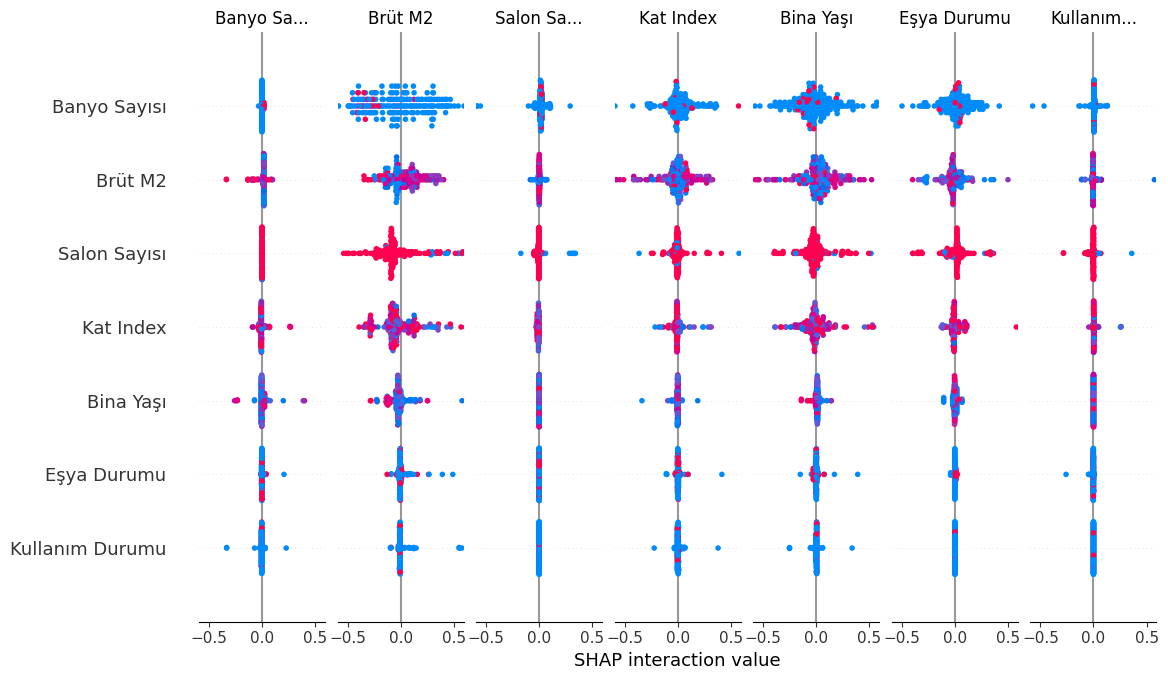

In [ ]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)



*   Shap modülü ile verilerin birbirleri ve kira ile ilişkisini inceliyorum.
* Brüt M2, Kat Index, Bina Yaşı ve Eşya Durumu sonucu en çok etkileyen değişkenler olarak karşıma çıktı bu yüzden sıradaki modelde sadece onları kullanıyorum.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("FinalDf.csv")

df = df[(df["Kira"] > 5000) & (df["Kira"] < 25000)]
df['Kira_Group'] = (df['Kira'] // 5000) * 5000


target_column = 'Kira_Group'
X = df[['Brüt M2', 'Kat Index', 'Bina Yaşı', 'Eşya Durumu']]
y = df[target_column]
X = pd.get_dummies(X, drop_first=True)


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf_classifier = grid_search.best_estimator_


y_pred = best_rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5911602209944752
              precision    recall  f1-score   support

        5000       0.44      0.39      0.41        18
       10000       0.73      0.66      0.70        92
       15000       0.51      0.65      0.57        54
       20000       0.31      0.24      0.27        17

    accuracy                           0.59       181
   macro avg       0.50      0.48      0.49       181
weighted avg       0.60      0.59      0.59       181



*  5000 ve 20000 gibi az sayıda elemana sahip grupların tahmin oranları çok düşük. Bu yüzden SMOTE ile bu sayıları arttıracağım.
*  Daha önceden grupları manuel bölüp 5000 altı ve 25000 üstü verileri veri setinden çıkarmıştım. Bu çoksağlıklı bir şey olmadığı için gruplandırmayı KMean ile yapacağım.

# **Final Model**

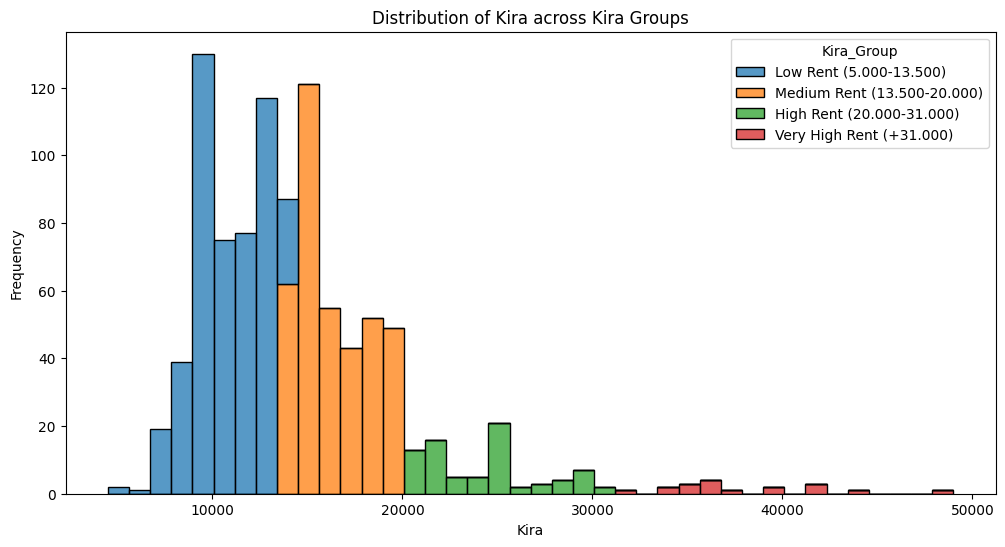

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Veri setini okuma
df = pd.read_csv("FinalDf.csv")


#KMeans ile veri setini 4 gruba ayırma
kira_values = df['Kira'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=56)
df['Kira_Group_Cluster'] = kmeans.fit_predict(kira_values)
cluster_names = ["Low Rent (5.000-13.500)", "High Rent (20.000-31.000)","Medium Rent (13.500-20.000)","Very High Rent (+31.000)"]
sorted_clusters = sorted(df['Kira_Group_Cluster'].unique())
cluster_mapping = {sorted_clusters[i]: cluster_names[i] for i in range(len(sorted_clusters))}
df['Kira_Group'] = df['Kira_Group_Cluster'].map(cluster_mapping)
df.drop(columns=['Kira_Group_Cluster'], inplace=True)


#Grafik
plt.figure(figsize=(12, 6))
sns.histplot(df, x='Kira', hue='Kira_Group', multiple="stack",bins=40)
plt.title('Distribution of Kira across Kira Groups')
plt.xlabel('Kira')
plt.ylabel('Frequency')
plt.show()

* KMeans grupları güzel duruyor.
* SMOTE ekleyip modeli sonlandırıyorum.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.cluster import KMeans

#Veri setini okuma
df = pd.read_csv("FinalDf.csv")


#KMeans ile veri setini 4 gruba ayırma
kira_values = df['Kira'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=4, random_state=56)
df['Kira_Group_Cluster'] = kmeans.fit_predict(kira_values)
cluster_names = ["Low Rent (5.000-13.500)", "Medium Rent (13.500-20.000)", "High Rent(20.000-31.000)", "Very High Rent(+31.000)"]
cluster_mapping = {sorted_clusters[i]: cluster_names[i] for i in range(len(sorted_clusters))}
df['Kira_Group'] = df['Kira_Group_Cluster'].map(cluster_mapping)
df.drop(columns=['Kira_Group_Cluster'], inplace=True)


#Grup dağılımları
print(df['Kira_Group'].value_counts())


#Hedeflenen kolonlar
X = df[['Brüt M2', 'Kat Index', 'Bina Yaşı', 'İlçe', 'Mahalle', 'Eşya Durumu']]
y = df['Kira_Group']
X = pd.get_dummies(X, columns=['İlçe', 'Mahalle'], drop_first=True)


#Ölçekleme
scaler = StandardScaler()
X = scaler.fit_transform(X)



smote = SMOTE(sampling_strategy='all', random_state=56)
X_smote, y_smote = smote.fit_resample(X, y)


#Train ve test verisini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=56)


#RandomForestClassifier
best_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'class_weight': 'balanced',
    'random_state': 56
}
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)


#Analiz
y_pred = best_rf_classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Kira_Group
Low Rent (5.000-13.500)        485
High Rent(20.000-31.000)       382
Medium Rent (13.500-20.000)     78
Very High Rent(+31.000)         18
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Accuracy: 0.8814432989690721
                             precision    recall  f1-score   support

   High Rent(20.000-31.000)       0.72      0.80      0.76        90
    Low Rent (5.000-13.500)       0.85      0.79      0.82       104
Medium Rent (13.500-20.000)       0.96      0.94      0.95        93
    Very High Rent(+31.000)       1.00      1.00      1.00       101

                   accuracy                           0.88       388
                  macro avg       0.88      0.88      0.88       388
               weighted avg       0.89      0.88      0.88       388



* %88 doğruluk oranı bizim için yeterli.
* Tek tek grupları incelediğimizde de sonuç gayet tatmin edici duruyor.
* Very High Rent %100 tahmin oranına sahip, lakin 18 örnek üzerinden SMOTE ile 500 yeni değer ürettiğimiz için üretilen değerlerin birbirlerine çok yakın olması beklenen bir durumdu.